In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugmechanisms/DOWNLOAD-adHR51GpyZwztvXIVQ3rkc5LgNb7lm3YyO0Bnu7QscE=.tsv
/kaggle/input/chembl22/chembl_22_clean_1576904_sorted_std_final.smi


# Drug Design with Small Molecule SMILES

## Introduction

In this project, we will attempt to find out if a machine learning alghoritm can predict medical usage of different chemicals based off of their structure.
### Why is this important?
One of the main usages of computers and machine learning in medicine is drug design and prediction of different drug mechanisms. This is something we couldn't do manually due to complex structure of majority of biochemical molecules. Here, we will start with small molecules to check how accurate model can be produced using simplest methods.

## Data

#### Datasets to be used are the following:



### Drug Design with Small Molecule SMILES - Dataset containing molecules in SMILES format
https://www.kaggle.com/datasets/art3mis/chembl22/data




In [4]:
path1 = '/kaggle/input/chembl22/chembl_22_clean_1576904_sorted_std_final.smi'
data1 = pd.read_csv(path1, sep='\t', header=None)
data1.head()

,0,1
0,CCO,CHEMBL545
1,C,CHEMBL17564
2,CO,CHEMBL14688
3,NCCS,CHEMBL602
4,NCCN,CHEMBL816


Since dataset is well documented, we have the following information about the columns:
 - The first column is the SMILES string.
 - The second is a reference to the full ChEMBL entry for that particular molecule. 


#### What is SMILES?
SMILES stands for “Simplified Molecular Input Line Entry System". 


The purpose of SMILES is to translate the 3D molecular structure of different chemicals into a linear representation of the molecule so that a computer program can understand the structure.


![](https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?cid=5288826&t=l)

Morphine, shown in picture, has SMILES format Oc1ccc2CC(N3C)C4C=CC(O)C5Oc1c2C45CC3.

##### Visualization
First off, let's start with checking how length of SMILES string behaves within the dataset.

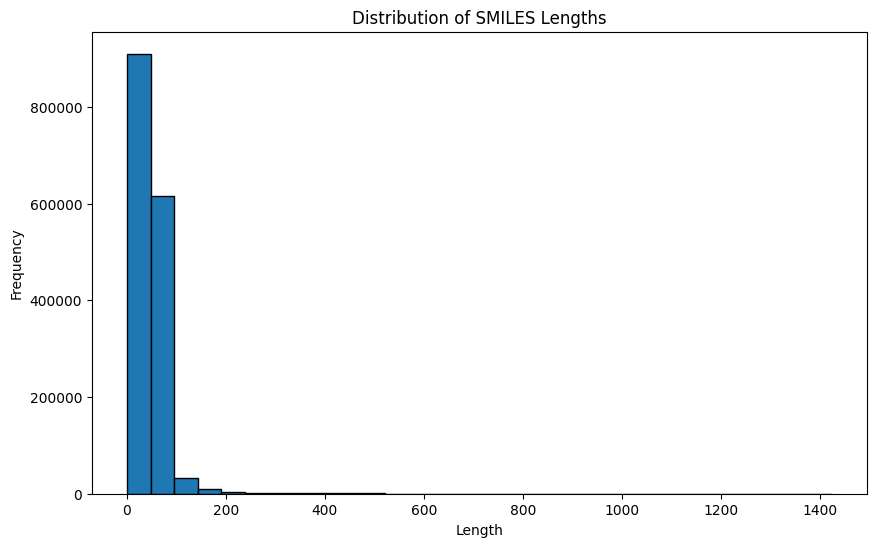

In [5]:
import matplotlib.pyplot as plt
lengths = data1[0].apply(len)
max_length_index = lengths.idxmax()
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, edgecolor='black')
plt.title('Distribution of SMILES Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

As we can see, majority of strings are shorter than 200 characters. Here, it would seem wise to use only the SMILES up to length 200, however most of the molecules that indeed have some medical usages are quite large. Therefore, we will try to work with everything available.


In [6]:
max_length = data1[0].apply(len).max()
print(f"The length of the longest element in the first column is: {max_length}")
print(f"That entry is: {data1[0][max_length_index]}")

The length of the longest element in the first column is: 1423
That entry is: CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC3OC(CC3OP(O)(=O)OCC34COCOC(C3O)C(O4)N3C=C(C)C(=O)NC3=O)N3C=C(C)C(=O)NC3=O)N3C=CC(N)=NC3=O)n3cnc4c(N)ncnc34)n3cnc4c3NC(N)=NC4=O)C(COP(O)(=O)OC3C(COP(O)(=O)OC4C(COP(O)(=O)OC5C(COP(O)(=O)OC6C(COP(O)(=O)OC7CC(OC7COP(O)(=O)OC7CC(OC7COP(O)(=O)OC7C(COP(O)(=O)OC8C(COP(O)(=O)OC9C(COP(O)(=O)OC%10C(COP(O)(=O)OC%11C(COP(O)(=O)OC%12C(COP(O)(=O)OC%13C(COP(O)(=O)OC%14C(COP(O)(=O)OC%15CC(OC%15COP(O)(=O)OC%15C(COP(O)(=O)OC%16C(COP(O)(=O)OC%17CC(OC%17COP(O)(=O)OC%17C(COP(O)(=O)OC%18C(COP(O)(=O)OC%19C(COP(O)(=O)OC%20CC(OC%20COP(O)(=O)OC%20C(COP(O)(=O)OC%21C(COc%22ccc%23c(Oc%24cc(O)ccc%24C%23%23OC(=O)c%24ccccc%23%24)c%22)OC(C%21O)n%21cnc%22c(N)ncnc%21%22)OC(C%20O)n%20cnc%21c%20N=C(N)NC%21=O)N%20C=C(C)C(=O)NC%20=O)OC(C%19O)N%19C=CC(N)=NC%19=O)OC(C%18O)N%18C=CC(N)=NC%18=O)OC(C%17O)n%17cnc%18c%17N=C(N)NC%18=O)N%17C=C(C)C(=O)NC%17=O)OC(C%16O)n%

However, we can't really use a string of length 1423 to store each molecule. This showcases why drug prediction is not so straightforward: meaningful data cannot be handled in a simple way. Here, we will have to settle for molecules up to 200 length (which covers majority of the dataset). 

#### - Dataset containing additional information, including medical usage: 
### ChEMBL database
ChEMBL data is from http://www.ebi.ac.uk/chembl - the version of ChEMBL is
chembl_34.

Since second column from the first dataset corresponds to ChEMBL molecule ID, we will find file from the database that contains both id and medical usage of a molecule.

In [7]:
path2 = '/kaggle/input/drugmechanisms/DOWNLOAD-adHR51GpyZwztvXIVQ3rkc5LgNb7lm3YyO0Bnu7QscE=.tsv'
data2 = pd.read_csv(path2, sep='\t')
data2.head()

,Parent Molecule ChEMBL ID,Parent Molecule Name,Parent Molecule Type,Max Phase,First Approval,USAN Stem,Smiles,Mechanism of Action,Mechanism Comment,Selectivity Comment,...,Binding Site Comment,References,Synonyms,ATC Codes,Level 4 ATC Codes,Level 3 ATC Codes,Level 2 ATC Codes,Level 1 ATC Codes,Parent Molecule ChEMBL ID.1,Np Likeness Score
0,CHEMBL1200908,HALOBETASOL PROPIONATE,Small molecule,4.0,1990.0,NaN,CCC(=O)O[C@]1(C(=O)CCl)[C@@H](C)C[C@H]2[C@@H]3...,Glucocorticoid receptor agonist,NaN,NaN,...,NaN,"{'CHEMBL1200908': [{'ref_id': '19293512', 'ref...","Halobetasol propionate (MI, USAN, USP)|Ulobeta...",D07AC21,"D07AC - Corticosteroids, potent (group III)","D07A - CORTICOSTEROIDS, PLAIN","D07 - CORTICOSTEROIDS, DERMATOLOGICAL PREPARAT...",D - DERMATOLOGICALS,CHEMBL1200908,1.74
1,CHEMBL2108655,TOLEVAMER POTASSIUM SODIUM,Small molecule,3.0,NaN,'-mer',NaN,Toxin B binding agent,NaN,NaN,...,NaN,"{'CHEMBL2108655': [{'ref_id': '16838228', 'ref...",Tolevamer potassium sodium (USAN)|,NaN,NaN,NaN,NaN,NaN,CHEMBL2108655,NaN
2,CHEMBL2109256,SGN-30,Antibody,3.0,NaN,NaN,NaN,Tumor necrosis factor receptor superfamily mem...,"After binding to CD30, this agent interferes w...",NaN,...,NaN,{'CHEMBL2109256': []},Sgn-30,NaN,NaN,NaN,NaN,NaN,CHEMBL2109256,NaN
3,CHEMBL3545295,AVE0847,Small molecule,1.0,NaN,NaN,NaN,Peroxisome proliferator-activated receptor gam...,Development discontinued (http://fr.reuters.co...,NaN,...,NaN,{'CHEMBL3545295': [{'ref_id': 'https://ncats.n...,Ave0847,NaN,NaN,NaN,NaN,NaN,CHEMBL3545295,NaN
4,CHEMBL3545176,DB959,Small molecule,2.0,NaN,NaN,NaN,Peroxisome proliferator-activated receptor gam...,Ph1b study completed in 2011 (no trial ID). Co...,NaN,...,NaN,{'CHEMBL3545176': [{'ref_id': 'http://www.dara...,Db959,NaN,NaN,NaN,NaN,NaN,CHEMBL3545176,NaN


tabs
https://www.kaggle.com/datasets/art3mis/chembl22/data
https://www.cheminformania.com/master-your-molecule-generator-seq2seq-rnn-models-with-smiles-in-keras/
https://www.cheminformania.com/learn-how-to-improve-smiles-based-molecular-autoencoders-with-heteroencoders/
https://www.kaggle.com/code/art3mis/220221-getting-started-with-smiles
https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/
https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/schema_documentation.html
https://www.epa.gov/sites/default/files/2015-05/documents/appendf.pdf

## Data preparation

Since our second dataset is much smaller (includes only confirmed activity of drugs), if we use inner join our model
 - will have less data to work with
 - will not be able to cope with molecules not simmilar to those with confirned drug activity
 
 To demonstrate size difference within sets:

In [8]:
print(data1.shape[0])
print(data2.shape[0])


1576904
6914


Therefore, we will perform left join on our datasets. Technically, data1 is a subset of data2, but the way kaggle dataset was filtered to make it more usable for machine learning is not clearly documented, so the same filtering cannot be performed on data2 manually to obtain equally good results. Since usability of data1 is marked by kaggle to be 10.0, we will just use the molecules present in that set.

In [9]:
data1.rename(columns={data1.columns[1]: 'ID'}, inplace=True)
data2.rename(columns={data2.columns[0]: 'ID'}, inplace=True)

merged_data = pd.merge(data1, data2, on='ID', how='left')

merged_data.head()

,0,ID,Parent Molecule Name,Parent Molecule Type,Max Phase,First Approval,USAN Stem,Smiles,Mechanism of Action,Mechanism Comment,...,Binding Site Comment,References,Synonyms,ATC Codes,Level 4 ATC Codes,Level 3 ATC Codes,Level 2 ATC Codes,Level 1 ATC Codes,Parent Molecule ChEMBL ID.1,Np Likeness Score
0,CCO,CHEMBL545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,CHEMBL17564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CO,CHEMBL14688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NCCS,CHEMBL602,CYSTEAMINE,Small molecule,4.0,1994.0,NaN,NCCS,Cystine reducing agent,NaN,...,NaN,{'CHEMBL2062263': [{'ref_id': 'setid=f495b76d-...,"Cysteamine (MI, USAN)|Mercaptamine (BAN, DCF, ...",A16AA04 | S01XA21,A16AA - Amino acids and derivatives | S01XA - ...,A16A - OTHER ALIMENTARY TRACT AND METABOLISM P...,A16 - OTHER ALIMENTARY TRACT AND METABOLISM PR...,A - ALIMENTARY TRACT AND METABOLISM | S - SENS...,CHEMBL602,0.18
4,NCCN,CHEMBL816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(merged_data.shape[0])


1577891


In [11]:
merged_data.rename(columns={merged_data.columns[0]: 'smiles'}, inplace=True)
final = merged_data[['smiles', 'ID', 'Parent Molecule Type', 'Mechanism of Action']]
final.head()

,smiles,ID,Parent Molecule Type,Mechanism of Action
0,CCO,CHEMBL545,NaN,NaN
1,C,CHEMBL17564,NaN,NaN
2,CO,CHEMBL14688,NaN,NaN
3,NCCS,CHEMBL602,Small molecule,Cystine reducing agent
4,NCCN,CHEMBL816,NaN,NaN


Tidying up the data in final table:

In [12]:

final['Mechanism of Action'] = final['Mechanism of Action'].fillna('No MOA')
final['Parent Molecule Type'] = final['Parent Molecule Type'].fillna('No MOA')

final.loc[final['Mechanism of Action'].str.contains('receptor agonist', case=False, na=False), 'Mechanism of Action'] = 'receptor agonist'
final.loc[final['Mechanism of Action'].str.contains('inhibitor', case=False, na=False), 'Mechanism of Action'] = 'inhibitor'
final.loc[final['Mechanism of Action'].str.contains('receptor antagonist', case=False, na=False), 'Mechanism of Action'] = 'receptor antagonist'

condition = final['Mechanism of Action'].str.contains('agonist', case=False, na=False) & \
            ~final['Mechanism of Action'].str.contains('receptor agonist', case=False, na=False)
final.loc[condition, 'Mechanism of Action'] = 'agonist'

final.loc[final['Mechanism of Action'].str.contains('blocker', case=False, na=False), 'Mechanism of Action'] = 'blocker'
final.loc[final['Mechanism of Action'].str.contains('receptor modulator', case=False, na=False), 'Mechanism of Action'] = 'receptor modulator'
final.loc[final['Mechanism of Action'].str.contains('disrupting agent', case=False, na=False), 'Mechanism of Action'] = 'disrupting agent'


condition2 = final['Mechanism of Action'].str.contains('potassium channel', case=False, na=False) & final['Mechanism of Action'].str.contains('opener', case=False, na=False)
final.loc[condition2, 'Mechanism of Action'] = 'potassium channel opener'


condition3 = final['Mechanism of Action'].str.contains('receptor', case=False, na=False) & final['Mechanism of Action'].str.contains('modulator', case=False, na=False)
final.loc[condition3, 'Mechanism of Action'] = 'receptor  modulator'


condition4 = final['Mechanism of Action'].str.contains('calcium channel', case=False, na=False) & final['Mechanism of Action'].str.contains('modulator', case=False, na=False)
final.loc[condition4, 'Mechanism of Action'] = 'calcium channel  modulator'

final.loc[final['Mechanism of Action'].str.contains('activator', case=False, na=False), 'Mechanism of Action'] = 'activator'

final.loc[final['Mechanism of Action'].str.contains('sequestering agent', case=False, na=False), 'Mechanism of Action'] = 'sequestering agent'
final.loc[final['Mechanism of Action'].str.contains('binding agent', case=False, na=False), 'Mechanism of Action'] = 'binding agent'

condition5 = final['Mechanism of Action'].str.contains('modulator', case=False, na=False) & \
            ~final['Mechanism of Action'].str.contains('calcium channel', case=False, na=False) & \
            ~final['Mechanism of Action'].str.contains('receptor', case=False, na=False)
final.loc[condition5, 'Mechanism of Action'] = 'modulator'
 
    
final.loc[final['Mechanism of Action'].str.contains('chelating agent', case=False, na=False), 'Mechanism of Action'] = 'chelating agent'
    
condition6 = final['Mechanism of Action'].str.contains('antioxidant', case=False, na=False) | final['Mechanism of Action'].str.contains('anti-oxidant', case=False, na=False)
final.loc[condition6, 'Mechanism of Action'] = 'antioxidant'

final.loc[final['Mechanism of Action'].str.contains('stabiliser', case=False, na=False), 'Mechanism of Action'] = 'stabiliser'


/tmp/ipykernel_33/2158050046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Mechanism of Action'] = final['Mechanism of Action'].fillna('No MOA')
/tmp/ipykernel_33/2158050046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Parent Molecule Type'] = final['Parent Molecule Type'].fillna('No MOA')


In [13]:
final.head()
print(final.shape[0])
print(final.columns)

1577891
Index(['smiles', 'ID', 'Parent Molecule Type', 'Mechanism of Action'], dtype='object')


In [16]:
from sklearn.model_selection import train_test_split
smiles_train, smiles_test = train_test_split(final["smiles"], random_state=42)

print(smiles_train.shape)
print(smiles_test.shape)

(1183418,)
(394473,)


In [18]:
charset = set("".join(list(final.smiles))+"!E")
char_to_int = dict((c,i) for i,c in enumerate(charset))
int_to_char = dict((i,c) for i,c in enumerate(charset))
embed = max([len(smile) for smile in final.smiles]) + 5
print(str(charset))
print(len(charset), embed)

{'7', 'P', 's', '/', ')', '4', '0', '+', 'l', 'o', '6', '[', '9', 'N', 'p', '3', 'O', 'c', ']', 'S', 'B', '(', '-', '#', '!', 'I', '1', 'n', 'E', 'C', '=', '5', 'H', '.', '\\', '2', '%', '8', 'r', 'F'}
40 1428


In [ ]:
def vectorize(smiles):
    one_hot = np.zeros((smiles.shape[0], embed, len(charset)), dtype=np.int8)
    
    for i, smile in enumerate(smiles):
        # Encode the start character
        one_hot[i, 0, char_to_int["!"]] = 1
        
        # Encode the rest of the characters
        for j, c in enumerate(smile):
            one_hot[i, j+1, char_to_int[c]] = 1  # Fix here: single square brackets
        
        # Encode the end character
        one_hot[i, len(smile)+1:, char_to_int["E"]] = 1
    
    # Return two arrays: one for input and the other for output
    return one_hot[:, 0:-1, :], one_hot[:, 1:, :]

# Apply the vectorize function
X_train, Y_train = vectorize(smiles_train.values)
X_test, Y_test = vectorize(smiles_test.values)

# Print the first entry in the training data
print(smiles_train.iloc[0])